# Regression - House Price Prediction

This is the second project in the ML for Data science series.

In this project we will try to predict banglore house prices based on the features provided using various machine learning techniques. We compare different machine learning models for their accuracy and performance. In the end we will create a deployable streamlit app and delpoy it on the streamlit server.

The data in this project is quite big with almost 13k entries. We will try to use this to make better predictions.

The aim of this project is to - 

- Study and practice in depth all the tools for EDA and feature engineering.
- Explore basic regression algo like linear,losso,ridge decisiontree and random forest , extratreeregressor. and performance matrices
- practice how to build streamlit app and deploy trained models on heroku server.



# Data importing and cleaning
source - https://www.kaggle.com/datasets/amitabhajoy/bengaluru-house-price-data

In [1]:
import pandas as pd
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("Bengaluru_House_Data.csv")
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:

df.info()

## total_sqft is not a float? why

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [4]:
print(df['area_type'].unique())
print(df['area_type'].value_counts())
print("\n")
print(df['availability'].unique())
print("\n")
print(df['location'].unique())
print("\n")
print(df['size'].unique())
print("\n")
print(df['society'].unique())
print("\n")
print(df['total_sqft'].unique())

['Super built-up  Area' 'Plot  Area' 'Built-up  Area' 'Carpet  Area']
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64


['19-Dec' 'Ready To Move' '18-May' '18-Feb' '18-Nov' '20-Dec' '17-Oct'
 '21-Dec' '19-Sep' '20-Sep' '18-Mar' '20-Feb' '18-Apr' '20-Aug' '18-Oct'
 '19-Mar' '17-Sep' '18-Dec' '17-Aug' '19-Apr' '18-Jun' '22-Dec' '22-Jan'
 '18-Aug' '19-Jan' '17-Jul' '18-Jul' '21-Jun' '20-May' '19-Aug' '18-Sep'
 '17-May' '17-Jun' '21-May' '18-Jan' '20-Mar' '17-Dec' '16-Mar' '19-Jun'
 '22-Jun' '19-Jul' '21-Feb' 'Immediate Possession' '19-May' '17-Nov'
 '20-Oct' '20-Jun' '19-Feb' '21-Oct' '21-Jan' '17-Mar' '17-Apr' '22-May'
 '19-Oct' '21-Jul' '21-Nov' '21-Mar' '16-Dec' '22-Mar' '20-Jan' '21-Sep'
 '21-Aug' '14-Nov' '19-Nov' '15-Nov' '16-Jul' '15-Jun' '17-Feb' '20-Nov'
 '20-Jul' '16-Sep' '15-Oct' '15-Dec' '16-Oct' '22-Nov' '15-Aug' '17-Jan'
 '16-Nov' '20-Apr' '16-Jan' '14-Jul']


['Electronic City 

# dropping unnecessary data

 areatype, availability, size and society not needed as they dont not provide good data or is irrelavanet e.g areatype it would have been better if all of them were of one category - but for our analysis it is okay to consider all of them are equal.
availibility doesnt matter, it would have been better if they would have given the dataset as availibility in terms of months (e,g 4 months to move in) but dates do not provide any relavent info
society does matter but location is highly correlated and relavent

also drop na - drop where there is no data 

convert size into number of bedrooms



In [5]:
data = df.drop(['area_type','society','availability'],axis='columns')
data.head()

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [6]:
data.isnull().sum()

location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

In [7]:
data = data.dropna()
data.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

In [8]:
data['bhk'] = data['size'].apply(lambda x: int(x.split(' ')[0]))
data = data.drop(['size'],axis='columns')
data = data[["location", "total_sqft", "bath" ,"balcony" ,"bhk","price" ]]
data.head()


,location,total_sqft,bath,balcony,bhk,price
0,Electronic City Phase II,1056,2.0,1.0,2,39.07
1,Chikka Tirupathi,2600,5.0,3.0,4,120.00
2,Uttarahalli,1440,2.0,3.0,3,62.00
3,Lingadheeranahalli,1521,3.0,1.0,3,95.00
4,Kothanur,1200,2.0,1.0,2,51.00


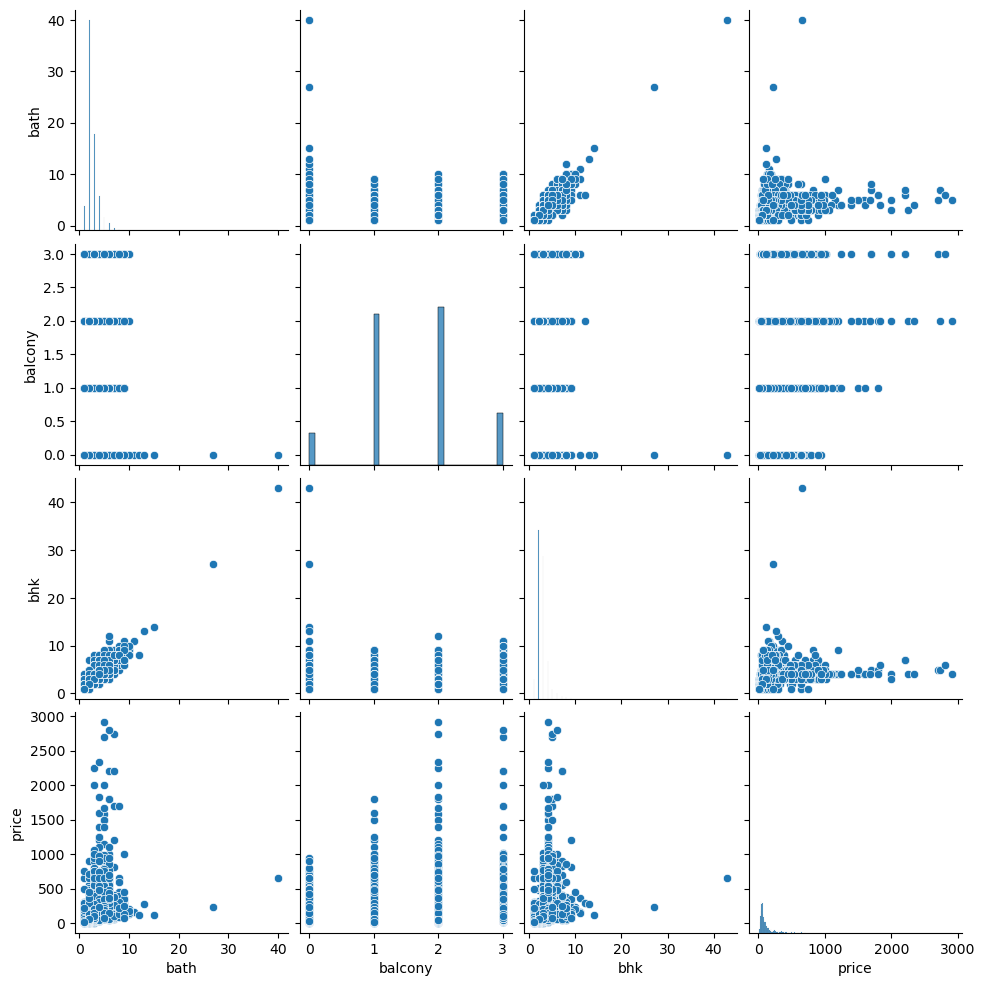

In [9]:
import seaborn as sns
sns.pairplot(data)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12710 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    12710 non-null  object 
 1   total_sqft  12710 non-null  object 
 2   bath        12710 non-null  float64
 3   balcony     12710 non-null  float64
 4   bhk         12710 non-null  int64  
 5   price       12710 non-null  float64
dtypes: float64(3), int64(1), object(2)
memory usage: 1.2+ MB


In [11]:
# total-sqft is object ,,,,why?
print(type(data.total_sqft[0]))
float(data.total_sqft[0]) 

<class 'str'>


1056.0

In [12]:
# get places where it is not able to convert to float

def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

data[~data['total_sqft'].apply(is_float)]


,location,total_sqft,bath,balcony,bhk,price
30,Yelahanka,2100 - 2850,4.0,0.0,4,186.000
122,Hebbal,3067 - 8156,4.0,0.0,4,477.000
137,8th Phase JP Nagar,1042 - 1105,2.0,0.0,2,54.005
165,Sarjapur,1145 - 1340,2.0,0.0,2,43.490
188,KR Puram,1015 - 1540,2.0,0.0,2,56.800
...,...,...,...,...,...,...
12975,Whitefield,850 - 1060,2.0,0.0,2,38.190
12990,Talaghattapura,1804 - 2273,3.0,0.0,3,122.000
13059,Harlur,1200 - 1470,2.0,0.0,2,72.760
13265,Hoodi,1133 - 1384,2.0,0.0,2,59.135


In [13]:
# convert all float,and range to mean float 

def float_sqft(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None  
    
data.total_sqft = data.total_sqft.apply(float_sqft)



In [14]:

data = data.dropna()
data.info()
data = data.reset_index(drop=True)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 12668 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    12668 non-null  object 
 1   total_sqft  12668 non-null  float64
 2   bath        12668 non-null  float64
 3   balcony     12668 non-null  float64
 4   bhk         12668 non-null  int64  
 5   price       12668 non-null  float64
dtypes: float64(4), int64(1), object(1)
memory usage: 692.8+ KB


# Feature Engineering

Create price/sqft and reduce the number of features


In [15]:
data['price_per_sqft'] = data['price']*100000/data['total_sqft']
data.head()

,location,total_sqft,bath,balcony,bhk,price,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,1.0,2,39.07,3699.810606
1,Chikka Tirupathi,2600.0,5.0,3.0,4,120.00,4615.384615
2,Uttarahalli,1440.0,2.0,3.0,3,62.00,4305.555556
3,Lingadheeranahalli,1521.0,3.0,1.0,3,95.00,6245.890861
4,Kothanur,1200.0,2.0,1.0,2,51.00,4250.000000


# Dimensionality Reduction
1. Location has 1265 unique entries which is to high and need to be reduced

In [16]:
print(len(data['location'].unique()))
print(len(data['bhk'].unique()))
print(len(data['balcony'].unique()))
print(len(data['bath'].unique()))

1259
16
4
16


In [17]:
location_stats = data['location'].value_counts(ascending=False)
location_stats

Whitefield           513
Sarjapur  Road       372
Electronic City      300
Kanakpura Road       259
Thanisandra          230
                    ... 
S R Layout             1
Meenakshi Layout       1
Vidyapeeta             1
Maruthi Extension      1
Abshot Layout          1
Name: location, Length: 1259, dtype: int64

In [18]:
len(location_stats[location_stats>10])
# only 237 locations with more that 10 entries


235

In [19]:
# Convert those 1265-237 locations into other
location_stats_less_than_10 = location_stats[location_stats<=10]
data.location = data.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
data['location'].value_counts(ascending=False)

other                 2756
Whitefield             513
Sarjapur  Road         372
Electronic City        300
Kanakpura Road         259
                      ... 
Pattandur Agrahara      11
Nagasandra              11
Mico Layout             11
Banjara Layout          11
LB Shastri Nagar        11
Name: location, Length: 236, dtype: int64

In [20]:
data.head()

,location,total_sqft,bath,balcony,bhk,price,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,1.0,2,39.07,3699.810606
1,Chikka Tirupathi,2600.0,5.0,3.0,4,120.00,4615.384615
2,Uttarahalli,1440.0,2.0,3.0,3,62.00,4305.555556
3,Lingadheeranahalli,1521.0,3.0,1.0,3,95.00,6245.890861
4,Kothanur,1200.0,2.0,1.0,2,51.00,4250.000000


## Outlier Removal Using Standard Deviation and Mean


in banglore - Clearly price per sqft cannot be less that 500 and greater than 50000 ,those are either wrong entries or outliers
Generally  ~ 300-1000 sqft/room + balcony makes sense clearely some are outliers


In [21]:
## in banglore - Clearly price per sqft cannot be less that 500 and greater than 50000 ,those are either wrong entries or outliers
data = data[~(data.price_per_sqft>30000)]
data = data[~(data.price_per_sqft<400)]
data.price_per_sqft.describe()
#sns.displot(data.price_per_sqft,kind="kde")



count    12633.000000
mean      6465.505434
std       3725.150561
min        416.666667
25%       4239.401496
50%       5363.443896
75%       7122.708039
max      30000.000000
Name: price_per_sqft, dtype: float64

In [22]:
data['sqft_room'] = data['total_sqft']/data['bhk']
data.head()

,location,total_sqft,bath,balcony,bhk,price,price_per_sqft,sqft_room
0,Electronic City Phase II,1056.0,2.0,1.0,2,39.07,3699.810606,528.0
1,Chikka Tirupathi,2600.0,5.0,3.0,4,120.00,4615.384615,650.0
2,Uttarahalli,1440.0,2.0,3.0,3,62.00,4305.555556,480.0
3,Lingadheeranahalli,1521.0,3.0,1.0,3,95.00,6245.890861,507.0
4,Kothanur,1200.0,2.0,1.0,2,51.00,4250.000000,600.0


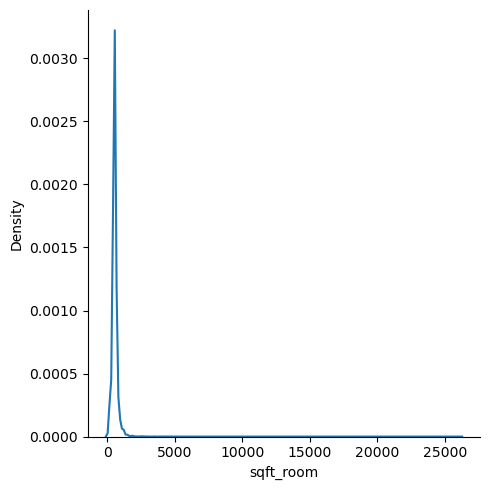

In [23]:
data.sqft_room.describe()
sns.displot(data.sqft_room,kind="kde")

In [24]:
# Generally  ~ 300-1000 sqft/roombalcony makes sense clearely some are outliers
data[data.total_sqft/data.bhk>1500]

,location,total_sqft,bath,balcony,bhk,price,price_per_sqft,sqft_room
390,Rajaji Nagar,12000.0,6.0,3.0,7,2200.0,18333.333333,1714.285714
418,Whitefield,11890.0,4.0,3.0,4,700.0,5887.300252,2972.500000
491,Banashankari Stage III,8500.0,4.0,2.0,4,145.0,1705.882353,2125.000000
576,Malleshwaram,12000.0,7.0,3.0,7,2200.0,18333.333333,1714.285714
769,other,10961.0,4.0,1.0,4,80.0,729.860414,2740.250000
...,...,...,...,...,...,...,...,...
12069,Sarjapur Road,6200.0,4.0,2.0,4,744.0,12000.000000,1550.000000
12354,other,30400.0,4.0,2.0,6,1824.0,6000.000000,5066.666667
12456,other,6652.0,6.0,1.0,4,660.0,9921.828022,1663.000000
12480,other,6688.0,6.0,1.0,4,700.0,10466.507177,1672.000000


In [25]:
# Generally  ~ 300-1000 sqft/room + balcony makes sense clearely some are outliers
data[data.total_sqft/data.bhk<300]

,location,total_sqft,bath,balcony,bhk,price,price_per_sqft,sqft_room
51,Murugeshpalya,1407.0,4.0,1.0,6,150.0,10660.980810,234.500000
61,other,1350.0,7.0,0.0,8,85.0,6296.296296,168.750000
63,other,500.0,3.0,2.0,3,100.0,20000.000000,166.666667
71,Kaval Byrasandra,460.0,1.0,0.0,2,22.0,4782.608696,230.000000
81,Rajaji Nagar,710.0,6.0,3.0,6,160.0,22535.211268,118.333333
...,...,...,...,...,...,...,...,...
12575,Laggere,1590.0,9.0,3.0,7,132.0,8301.886792,227.142857
12577,other,1178.0,9.0,1.0,9,75.0,6366.723260,130.888889
12632,Margondanahalli,1375.0,5.0,1.0,5,125.0,9090.909091,275.000000
12654,Vidyaranyapura,774.0,5.0,3.0,5,70.0,9043.927649,154.800000


In [26]:
data = data[~(data.total_sqft/data.bhk<300)]
data = data[~(data.total_sqft/data.bhk>1500)]

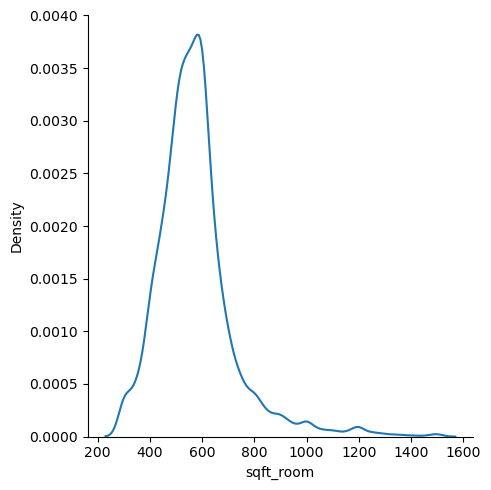

In [27]:
data.sqft_room.describe()
sns.displot(data.sqft_room,kind="kde")

### Let's check if for a given location how does the 2 BHK and 3 BHK property prices look like


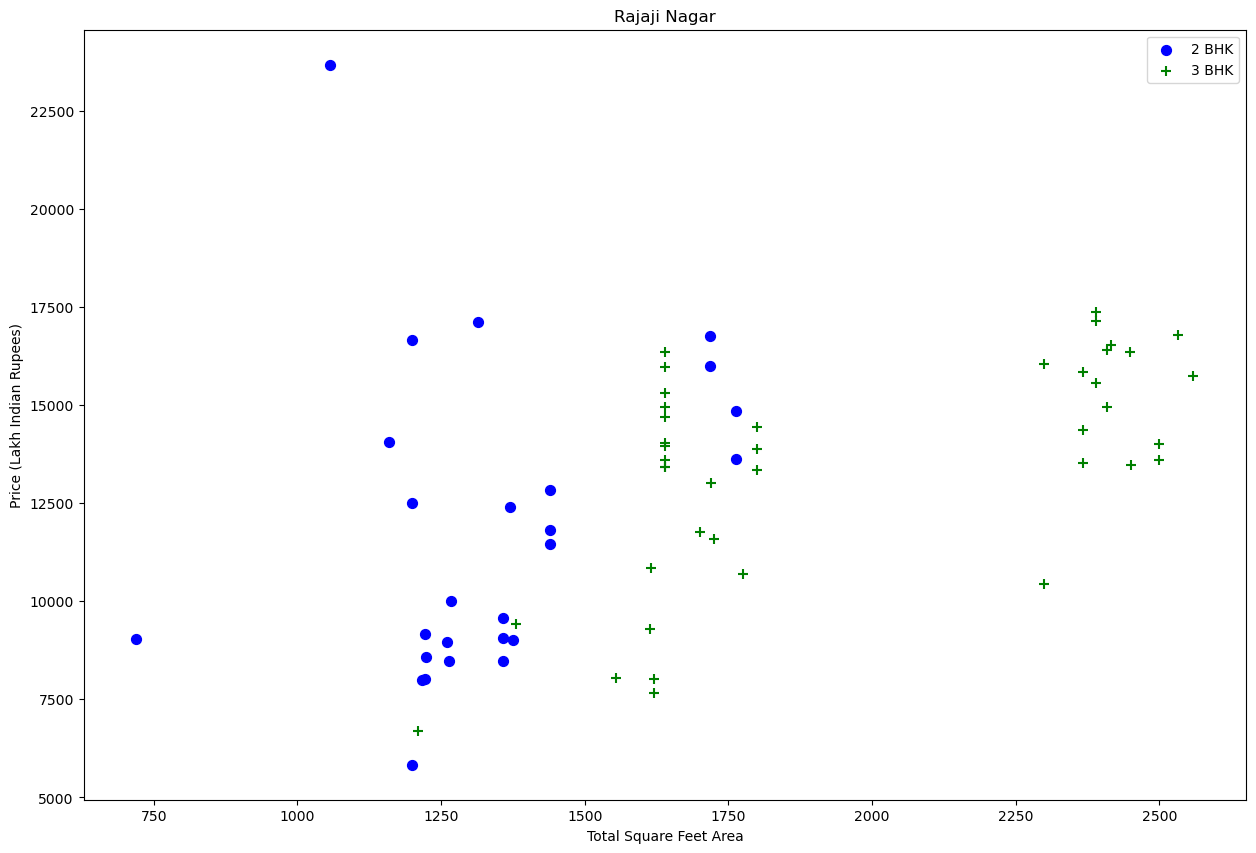

In [28]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price_per_sqft,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price_per_sqft,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(data,"Rajaji Nagar")

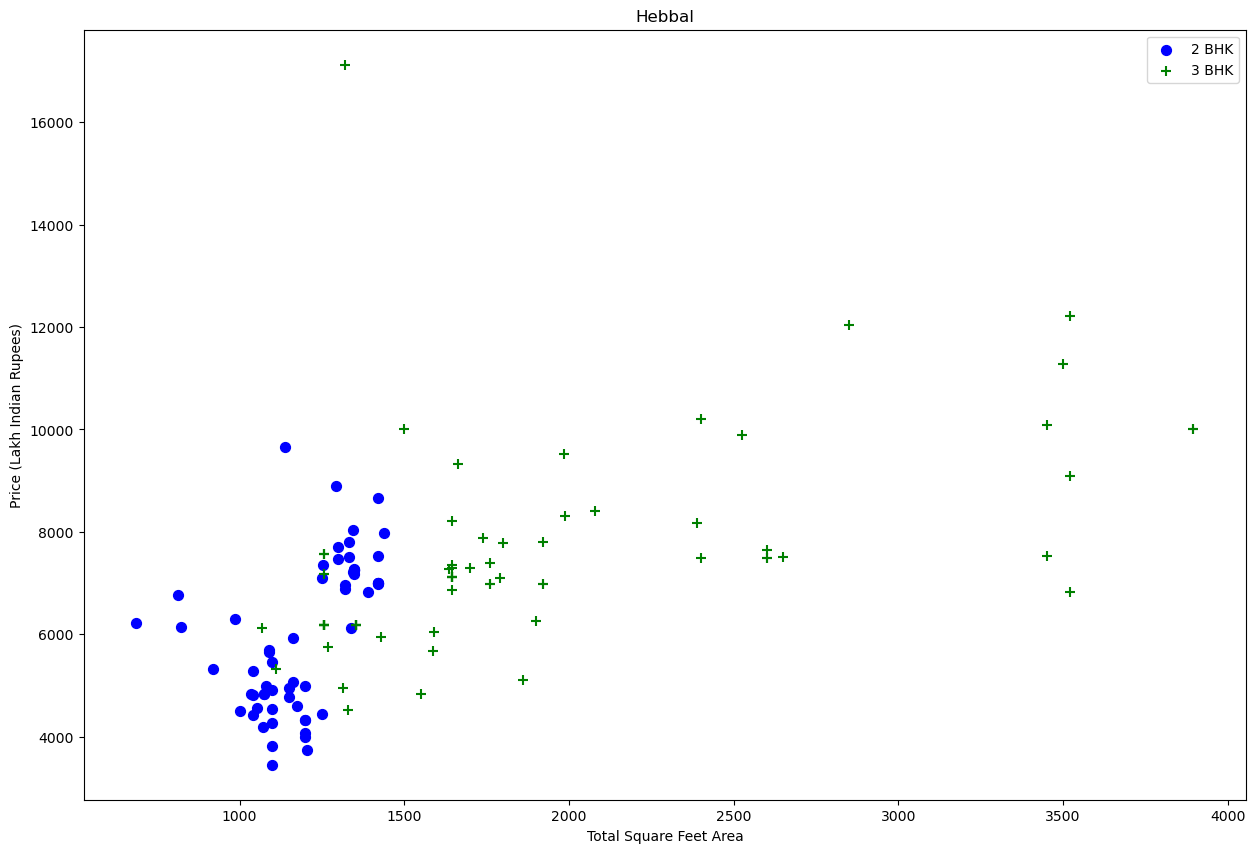

In [29]:

plot_scatter_chart(data,"Hebbal")

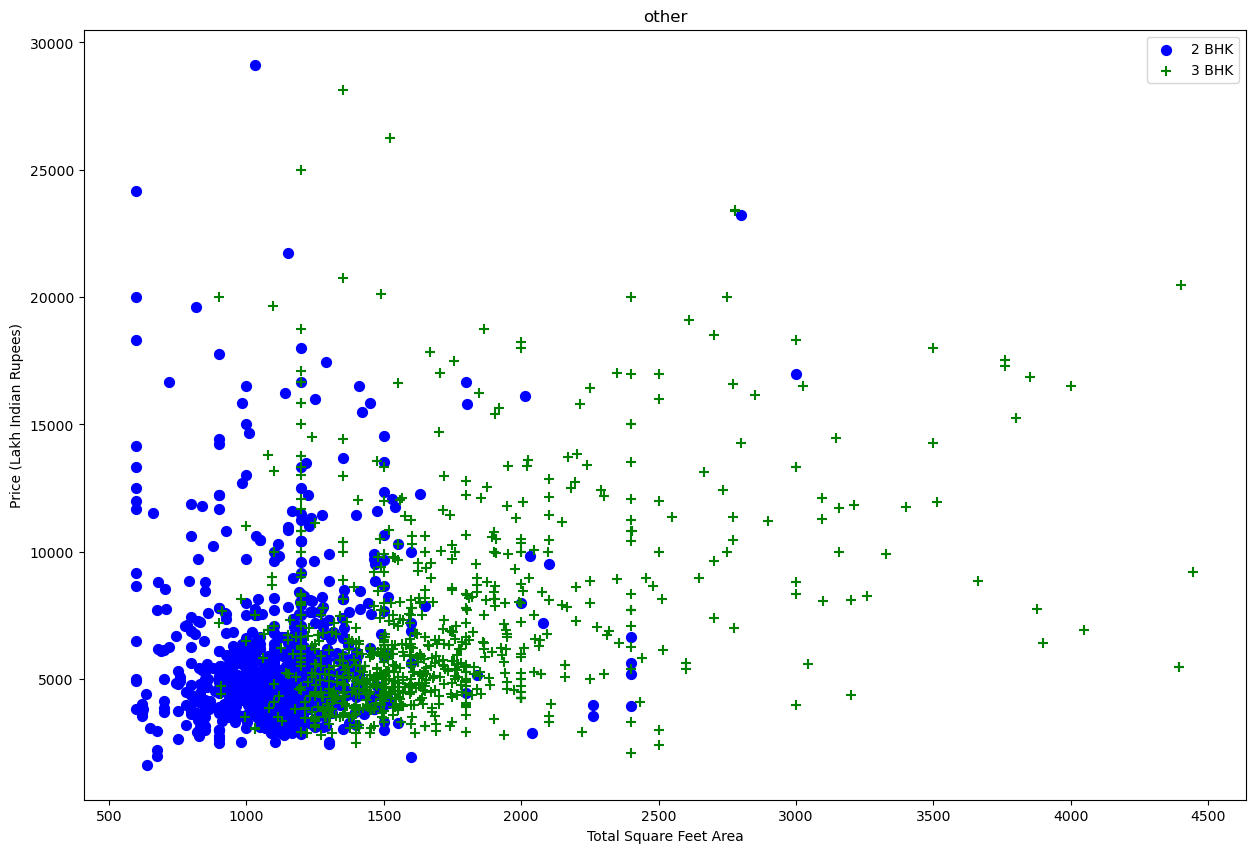

In [30]:
plot_scatter_chart(data,"other")

### Remove entries where 2bhk < 3bhk


In [31]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    
    return df.drop(exclude_indices,axis='index')

data1 = remove_bhk_outliers(data)
# df8 = df7.copy()

data1.shape


(8385, 8)

In [32]:
data.shape

(11925, 8)

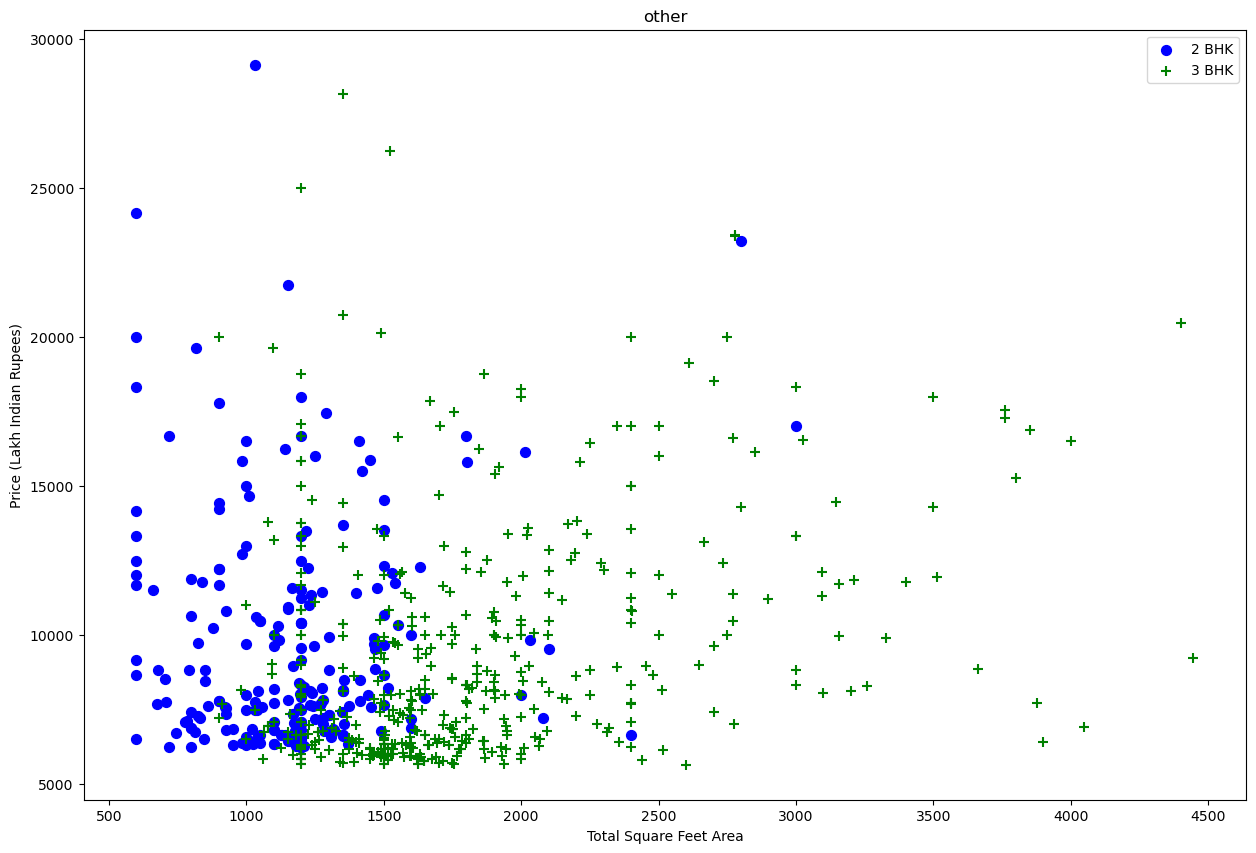

In [33]:
plot_scatter_chart(data1,"other")

In [ ]:
data

### It is unusual to have 2 more bathrooms than number of bedrooms in a home

In [34]:
data1[data1.bath>data1.bhk+2]

,location,total_sqft,bath,balcony,bhk,price,price_per_sqft,sqft_room
6476,Rajaji Nagar,7500.0,8.0,3.0,5,1700.0,22666.666667,1500.0
7299,Chikkabanavar,2460.0,7.0,2.0,4,80.0,3252.032520,615.0
11509,Thanisandra,1806.0,6.0,2.0,3,116.0,6423.034330,602.0


In [35]:
data1= data1[data1.bath<data1.bhk+2]

In [36]:
## Also now lets drop as we have used the last two created features for filtering the data
data1 = data1.drop(['price_per_sqft','sqft_room'],axis='columns')
data1 = data1.reset_index(drop=True)
data1

,location,total_sqft,bath,balcony,bhk,price
0,Electronic City Phase II,1056.0,2.0,1.0,2,39.07
1,Chikka Tirupathi,2600.0,5.0,3.0,4,120.00
2,Uttarahalli,1440.0,2.0,3.0,3,62.00
3,Lingadheeranahalli,1521.0,3.0,1.0,3,95.00
4,Kothanur,1200.0,2.0,1.0,2,51.00
...,...,...,...,...,...,...
8275,Uttarahalli,1345.0,2.0,1.0,3,57.00
8276,Green Glen Layout,1715.0,3.0,3.0,3,112.00
8277,Raja Rajeshwari Nagar,1141.0,2.0,1.0,2,60.00
8278,Padmanabhanagar,4689.0,4.0,1.0,4,488.00


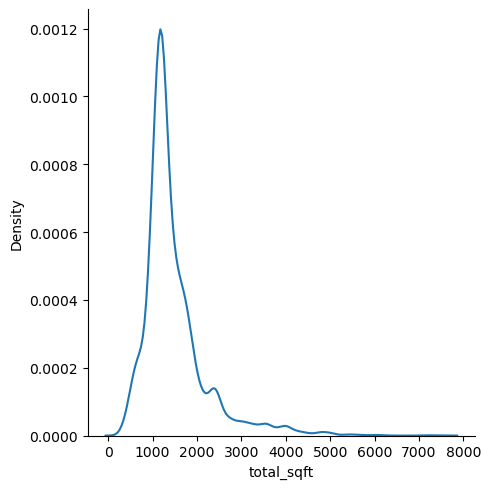

In [37]:
#data1.sort_values('location').location.unique()
sns.displot(data1.total_sqft,kind="kde")

In [38]:
## checking correlation between features and also between features and target
data1.corr()

,total_sqft,bath,balcony,bhk,price
total_sqft,1.000000,0.757313,0.279804,0.740309,0.788132
bath,0.757313,1.000000,0.294960,0.896422,0.610477
balcony,0.279804,0.294960,1.000000,0.271409,0.172102
bhk,0.740309,0.896422,0.271409,1.000000,0.602290
price,0.788132,0.610477,0.172102,0.602290,1.000000


In [39]:
# # Hot Encoding For Location location data using LabelEncoder
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# data1["location_encode"] = le.fit_transform(data1.location)
# data1

In [40]:
#bath and bhk have high correlation, 1 of them can be neglected. We decided to remove bath. Price doesent have very low corr so nothing reduced.
#data1 = data1.drop(['bath',],axis='columns')
data1
data1.to_csv("Final_data0.csv")
data1

,location,total_sqft,bath,balcony,bhk,price
0,Electronic City Phase II,1056.0,2.0,1.0,2,39.07
1,Chikka Tirupathi,2600.0,5.0,3.0,4,120.00
2,Uttarahalli,1440.0,2.0,3.0,3,62.00
3,Lingadheeranahalli,1521.0,3.0,1.0,3,95.00
4,Kothanur,1200.0,2.0,1.0,2,51.00
...,...,...,...,...,...,...
8275,Uttarahalli,1345.0,2.0,1.0,3,57.00
8276,Green Glen Layout,1715.0,3.0,3.0,3,112.00
8277,Raja Rajeshwari Nagar,1141.0,2.0,1.0,2,60.00
8278,Padmanabhanagar,4689.0,4.0,1.0,4,488.00


In [41]:
data1[data1.location == "Kothanur"].iloc[0].bath

2.0

In [175]:
data1.iloc[5546]

location      Sarjapur
total_sqft      1044.0
bath               2.0
balcony            2.0
bhk                  2
price             34.0
Name: 5546, dtype: object

In [43]:
# Hot Encoding For Location location data using dummies
data_final = pd.get_dummies(data1)

data_final.to_csv("Final_data.csv")
data_final

,total_sqft,bath,balcony,bhk,price,location_ Devarachikkanahalli,location_1st Block Jayanagar,location_1st Phase JP Nagar,location_2nd Phase Judicial Layout,location_2nd Stage Nagarbhavi,...,location_Vishveshwarya Layout,location_Vishwapriya Layout,location_Vittasandra,location_Whitefield,location_Yelachenahalli,location_Yelahanka,location_Yelahanka New Town,location_Yelenahalli,location_Yeshwanthpur,location_other
0,1056.0,2.0,1.0,2,39.07,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2600.0,5.0,3.0,4,120.00,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1440.0,2.0,3.0,3,62.00,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1521.0,3.0,1.0,3,95.00,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1200.0,2.0,1.0,2,51.00,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8275,1345.0,2.0,1.0,3,57.00,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8276,1715.0,3.0,3.0,3,112.00,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8277,1141.0,2.0,1.0,2,60.00,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8278,4689.0,4.0,1.0,4,488.00,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


total_sqft                     1044.0
bath                              2.0
balcony                           2.0
bhk                               2.0
price                            34.0
                                ...  
location_Yelahanka                0.0
location_Yelahanka New Town       0.0
location_Yelenahalli              0.0
location_Yeshwanthpur             0.0
location_other                    0.0
Name: 5546, Length: 241, dtype: float64

# Training the model

In [126]:
X =  data_final.drop(['price'],axis='columns')
y =  data_final.price

In [127]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)


In [128]:
dummy_test = X_test
dummy_test

,total_sqft,bath,balcony,bhk,location_ Devarachikkanahalli,location_1st Block Jayanagar,location_1st Phase JP Nagar,location_2nd Phase Judicial Layout,location_2nd Stage Nagarbhavi,location_5th Phase JP Nagar,...,location_Vishveshwarya Layout,location_Vishwapriya Layout,location_Vittasandra,location_Whitefield,location_Yelachenahalli,location_Yelahanka,location_Yelahanka New Town,location_Yelenahalli,location_Yeshwanthpur,location_other
5546,1044.0,2.0,2.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6505,1103.0,2.0,2.0,2,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1487,1018.0,2.0,0.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6176,1360.0,2.0,1.0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3385,1200.0,3.0,2.0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1622,1418.0,2.0,2.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4282,1240.0,2.0,2.0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1535,1200.0,2.0,1.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3717,1760.0,2.0,1.0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


### You can also perform standardisation on features

In [129]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
import pickle
pickle.dump(scaler,open('scaling.pkl','wb'))

In [137]:
X_test[0].shape

(240,)

In [58]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(X_train,y_train)
regression.score(X_test,y_test)

0.7151217042850035

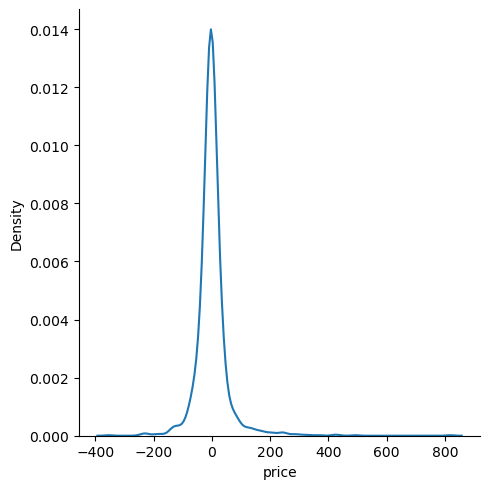

In [59]:
reg_pred=regression.predict(X_test)
residuals=y_test-reg_pred
#plt.scatter(y_test,reg_pred)
sns.displot(residuals,kind="kde")

#### Use K Fold cross validation to measure accuracy of our LinearRegression model

In [60]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

#We can see that in 5 iterations we get a score above 70% all the time. This is pretty good but we want to test few other algorithms for regression to see if we can get even better score. We will use GridSearchCV for this purpose

array([0.71680148, 0.70822932, 0.72526001, 0.70794738, 0.70916823])

0.6355763552406763


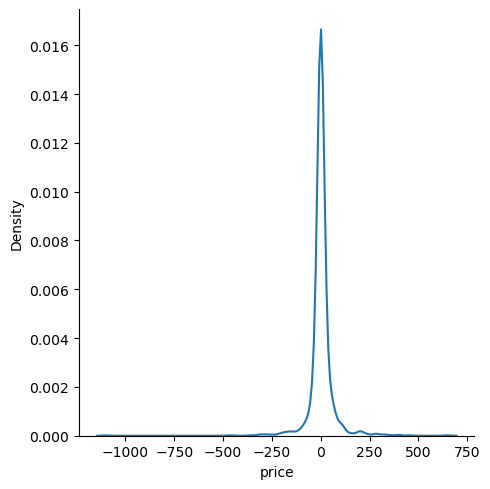

In [61]:
from sklearn.tree import DecisionTreeRegressor

DTree=DecisionTreeRegressor(min_samples_leaf=.0001)
DTree.fit(X_train,y_train)

DTree_predict=DTree.predict(X_test)
from sklearn.metrics import r2_score
print(r2_score(y_test,DTree_predict))


residuals=y_test- DTree_predict
#plt.scatter(y_test,reg_pred)
sns.displot(residuals,kind="kde")

0.7230414402637222


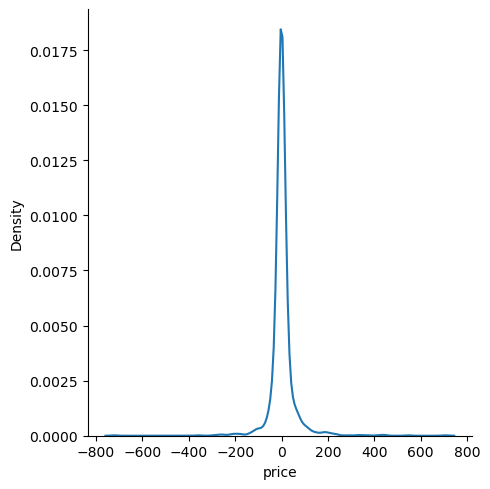

In [62]:
#Preparing Random Forest REgression
from sklearn.ensemble import RandomForestRegressor
RForest=RandomForestRegressor(n_estimators=100,random_state=329,min_samples_leaf=.0001)
RForest.fit(X_train,y_train)
RForest.score(X_test,y_test)

RForest_predict=RForest.predict(X_test)
print(r2_score(y_test,RForest_predict))
residuals=y_test- RForest_predict
#plt.scatter(y_test,reg_pred)
sns.displot(residuals,kind="kde")

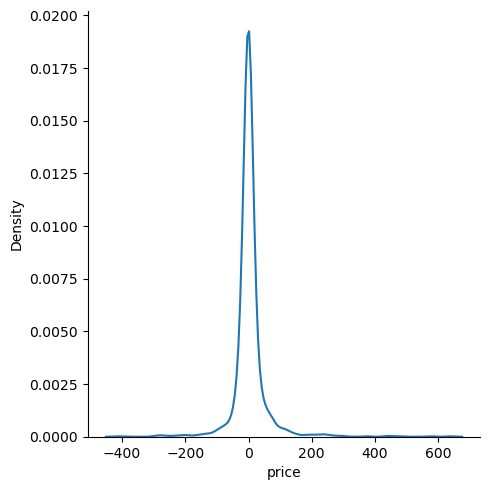

In [63]:
#Preparing Extra Tree Regression
from sklearn.ensemble import  ExtraTreesRegressor
ETree=ExtraTreesRegressor(n_estimators = 100,random_state=0)
ETree.fit(X_train,y_train)
ETree.score(X_test,y_test)

ETree_predict=ETree.predict(X_test)
residuals=y_test-ETree_predict
#plt.scatter(y_test,reg_pred)
sns.displot(residuals,kind="kde")



In [64]:
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(ExtraTreesRegressor(), X, y, cv=cv)
# ETree_predict=ETree.predict(X_test)
# from sklearn.metrics import r2_score
r2_score(y_test,ETree_predict)

0.7402903513136224

In [65]:
from sklearn.linear_model import Lasso

LassoR = Lasso()
LassoR.fit(X_train,y_train)
LassoR.score(X_test,y_test)

0.7061585496842568

In [66]:
from sklearn.linear_model import Ridge

RidgeR = Ridge()
RidgeR.fit(X_train,y_train)
RidgeR.score(X_test,y_test)

0.7150353265268543

# Export Models using pickle

In [67]:
import pickle

pickle.dump(regression, open('LR.pkl', 'wb'))
pickle.dump(RForest, open('RF.pkl', 'wb'))
pickle.dump(ETree, open('ET.pkl', 'wb'))

#import model
scaling_ar = pickle.load(open('scaling.pkl', 'rb'))

In [172]:
# scaler.transform(dummy_test[0])
dummy_test.iloc[0:1]
#sc_transf = scaling_ar.transform(dummy_test.iloc[0:1])
#ETree.predict(sc_transf.reshape(1,-1))

,total_sqft,bath,balcony,bhk,location_ Devarachikkanahalli,location_1st Block Jayanagar,location_1st Phase JP Nagar,location_2nd Phase Judicial Layout,location_2nd Stage Nagarbhavi,location_5th Phase JP Nagar,...,location_Vishveshwarya Layout,location_Vishwapriya Layout,location_Vittasandra,location_Whitefield,location_Yelachenahalli,location_Yelahanka,location_Yelahanka New Town,location_Yelenahalli,location_Yeshwanthpur,location_other
5546,1044.0,2.0,2.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [176]:
input_data = data_final.iloc[0:1].copy()
input_data= input_data.drop(['price'],axis='columns')
input_data.iloc[:] = 0


location = "Sarjapur"
input_data.total_sqft = 1044
input_data.bath = 2
input_data.balcony = 2
input_data.bhk = 2
input_data["location_"+location] =1

input_data = scaling_ar.transform(input_data)
input_data
ETree.predict(input_data.reshape(1,-1))

array([34.])

In [109]:
ETree.predict(X_test[0].reshape(1,-1))

array([34.])

In [ ]:
## make sure you apply standardization while applying the data

In [150]:
input_data = data_final.iloc[0:1].copy().drop(['price']).copy()

input_data.iloc[:] = 0

location = "Yeshwanthpur"
input_data.total_sqft = 1056
input_data.bath = 1
input_data.balcony = 1
input_data.bhk = 1
input_data["location_"+location] =1
#input_data =input_data.reshape(1,-1)
input_data

KeyError: "['price'] not found in axis"